In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
from ultralytics import YOLO
import random

## テストデータの推論

In [3]:
# テストデータへのpathのリストを取得
data_dir = "C:/Users/yuuki/Kaggle/object_detection_try/shellfish_v2/after_data/test"
image_paths = [os.path.join(data_dir, 'images', filename) for filename in os.listdir(os.path.join(data_dir, 'images')) if filename.endswith(".jpg")]

In [4]:
# bestなモデルの読み込み
best_model = YOLO("runs/detect/train/weights/best.pt")

In [5]:
# 推論
results = best_model(image_paths)


0: 416x416 1 Crab, 1 Shrimp, 15.8ms
1: 416x416 1 Crab, 15.8ms
2: 416x416 4 Shrimps, 15.8ms
3: 416x416 1 Crab, 15.8ms
4: 416x416 1 Lobster, 15.8ms
5: 416x416 9 Shrimps, 15.8ms
6: 416x416 1 Lobster, 15.8ms
7: 416x416 1 Crab, 15.8ms
8: 416x416 2 Shrimps, 15.8ms
9: 416x416 1 Crab, 15.8ms
10: 416x416 1 Crab, 15.8ms
11: 416x416 2 Crabs, 15.8ms
12: 416x416 4 Shrimps, 15.8ms
13: 416x416 1 Crab, 15.8ms
14: 416x416 3 Shrimps, 15.8ms
15: 416x416 2 Shrimps, 15.8ms
16: 416x416 2 Lobsters, 15.8ms
17: 416x416 1 Lobster, 15.8ms
18: 416x416 3 Shrimps, 15.8ms
19: 416x416 1 Shrimp, 15.8ms
20: 416x416 1 Crab, 15.8ms
21: 416x416 1 Lobster, 15.8ms
22: 416x416 1 Crab, 15.8ms
23: 416x416 2 Crabs, 15.8ms
24: 416x416 1 Crab, 15.8ms
25: 416x416 1 Lobster, 15.8ms
26: 416x416 3 Shrimps, 15.8ms
27: 416x416 (no detections), 15.8ms
28: 416x416 (no detections), 15.8ms
29: 416x416 2 Shrimps, 15.8ms
30: 416x416 3 Crabs, 15.8ms
31: 416x416 1 Shrimp, 15.8ms
32: 416x416 2 Lobsters, 15.8ms
33: 416x416 3 Crabs, 15.8ms
34: 4

In [5]:
# Visualize the results
for i, r in enumerate(results[:5]):
    # Plot results image (assuming plot() returns BGR-order NumPy array)
    im_bgr = r.plot()

    # Convert to RGB for display (if necessary)
    # im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

    # Show results (consider environment and preference)
    cv2.imshow(f"Detection {i}", im_bgr)  # Using OpenCV for consistent display
    cv2.waitKey(0)  # Wait for key press to close window
    cv2.destroyAllWindows()

    # Optionally, save the image (uncomment if desired)
    # cv2.imwrite(f"detection_{i}.jpg", im_rgb)

In [6]:
# テストデータの保存先
os.makedirs("./inference_test", exist_ok=True)

In [7]:
# 保存
for i, r in enumerate(results):
    img = r.plot()
    cv2.imwrite(f"./inference_test/detection_{i}.jpg", img)

## テストデータ推論結果の描画

In [9]:
# 再度同じシード値で乱数を生成
random.seed(1)
# bboxを描画した画像が保存されたdirへのpath
path = "inference_test"

# ランダムな9枚のbboxを描画した画像の相対pathのリスト
image_list = []

# フォルダ内のすべてのファイル名を取得
filenames = os.listdir(path)

# ランダムに 9枚の画像を選択
for _ in range(9):
    random_filename = random.choice(filenames)
    image_list.append(os.path.join(path, random_filename))

print(image_list)

['inference_test\\detection_16.jpg', 'inference_test\\detection_41.jpg', 'inference_test\\detection_6.jpg', 'inference_test\\detection_55.jpg', 'inference_test\\detection_52.jpg', 'inference_test\\detection_12.jpg', 'inference_test\\detection_23.jpg', 'inference_test\\detection_15.jpg', 'inference_test\\detection_37.jpg']


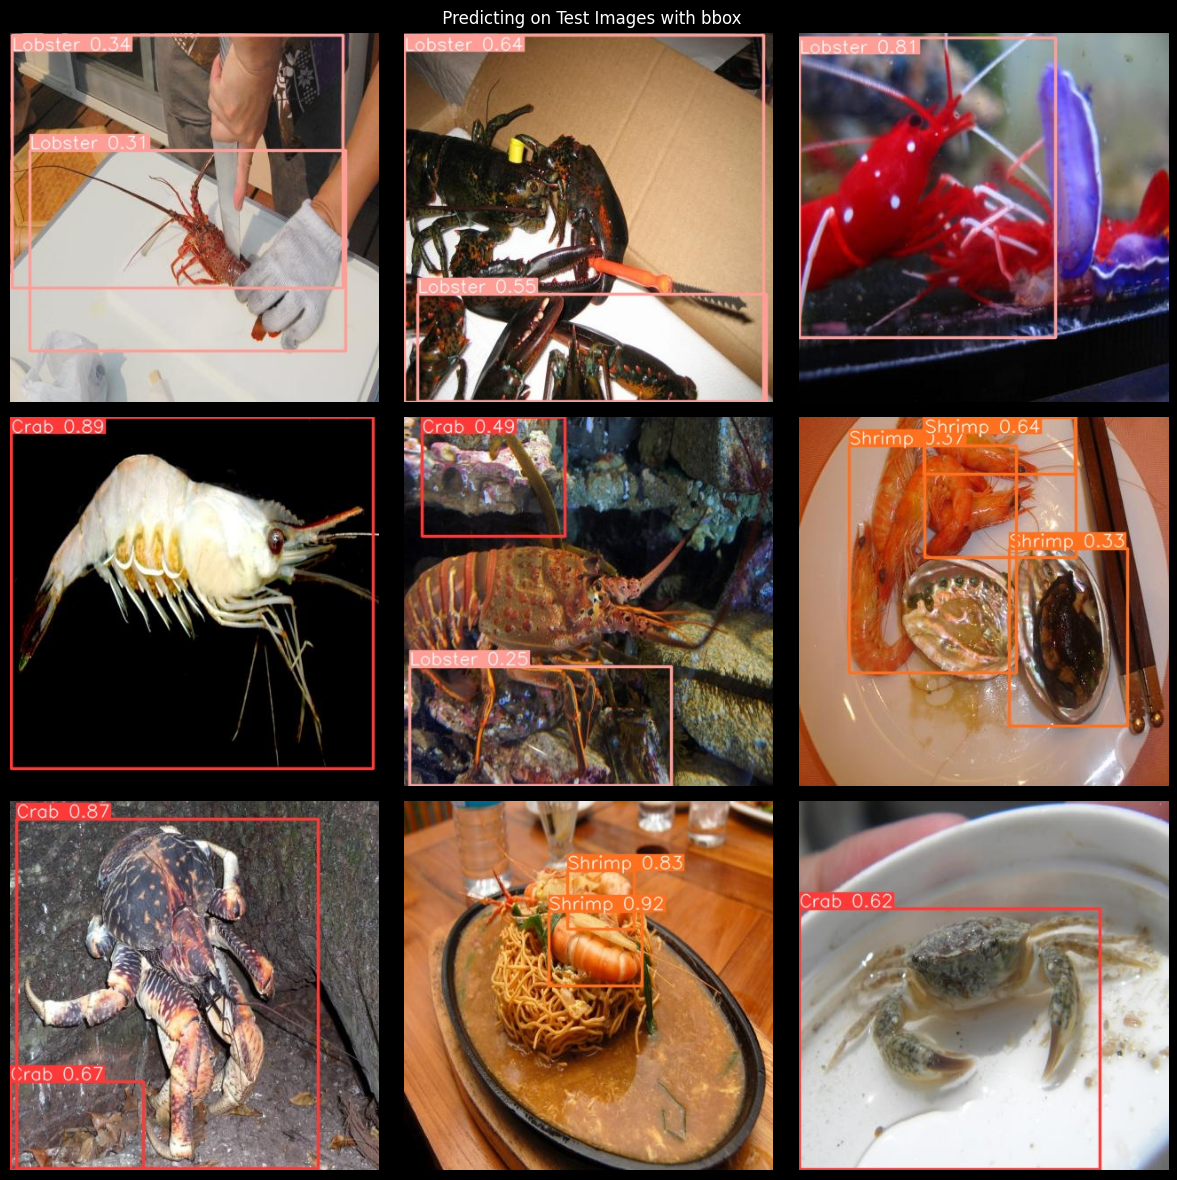

In [10]:
plt.style.use("dark_background")
# 3x3のサブプロットを作成
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# 各画像を読み込んで描画
for i, image_path in enumerate(image_list):
    row = i // 3  # 行番号を取得
    col = i % 3  # 列番号を取得
    image = plt.imread(image_path)
    axes[row, col].imshow(image)

# タイトルと軸ラベルを設定
fig.suptitle(" Predicting on Test Images with bbox")
for ax in axes.flat:
    ax.axis('off')  # 軸ラベルと目盛線を非表示

# グラフを表示
plt.tight_layout()  # サブプロット間の余白を調整
plt.savefig("detecting_test.jpg")

## 動画データの推論

In [34]:
video_path = "movie/sample.mp4"
cap = cv2.VideoCapture(video_path)

In [35]:
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success == False:
        break

    elif success:
        # Run YOLOv8 inference on the frame
        results = best_model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)
    # 動画の再生中にescを押されると動画が止まるように設定(27はescに対応)
    if cv2.waitKey(30) == 27:
        break
cv2.destroyAllWindows()
# メモリの解放
cap.release()


0: 256x416 1 Crab, 196.0ms
Speed: 4.0ms preprocess, 196.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 222.0ms
Speed: 2.0ms preprocess, 222.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.9ms
Speed: 1.1ms preprocess, 14.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1,

In [39]:
# 動画ファイルのパス
video_path = "movie/sample.mp4"

# 動画キャプチャオブジェクトを作成
cap = cv2.VideoCapture(video_path)

# 動画書き込み用のWriterオブジェクトを作成
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # 動画コーデックを指定
output_path = "movie/sample_inference.mp4"  # 出力動画ファイルのパス
writer = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    # フレームを取得
    success, frame = cap.read()
    if not success:
        break

    # YOLOv8推論を実行
    results = best_model(frame)

    # 推論結果と元のフレームを結合して新しいフレームを作成
    annotated_frame = results[0].plot()
    annotated_frame = cv2.addWeighted(frame, 0.5, annotated_frame, 0.5, 0.0)
    # 表示
    cv2.imshow("YOLOv8 Inference", annotated_frame)

    # 新しいフレームを動画ファイルに書き込む
    writer.write(annotated_frame)

    # 動画の再生中にEscキーを押すとループを抜ける
    if cv2.waitKey(1) & 0xFF == 27:
        break

# メモリ開放
cap.release()
writer.release()
cv2.destroyAllWindows()

0: 256x416 1 Crab, 169.0ms
Speed: 3.0ms preprocess, 169.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 131.0ms
Speed: 2.0ms preprocess, 131.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.5ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 13.2ms
Speed: 1.0ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 0.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 12.1ms
Speed: 1.0ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 

In [40]:
# 動画ファイルのパス
video_path = "movie/sample2.mp4"

# 動画キャプチャオブジェクトを作成
cap = cv2.VideoCapture(video_path)

# 動画書き込み用のWriterオブジェクトを作成
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # 動画コーデックを指定
output_path = "movie/sample2_inference.mp4"  # 出力動画ファイルのパス
writer = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    # フレームを取得
    success, frame = cap.read()
    if not success:
        break

    # YOLOv8推論を実行
    results = best_model(frame)

    # 推論結果と元のフレームを結合して新しいフレームを作成
    annotated_frame = results[0].plot()
    annotated_frame = cv2.addWeighted(frame, 0.5, annotated_frame, 0.5, 0.0)
    # 表示
    cv2.imshow("YOLOv8 Inference", annotated_frame)

    # 新しいフレームを動画ファイルに書き込む
    writer.write(annotated_frame)

    # 動画の再生中にEscキーを押すとループを抜ける
    if cv2.waitKey(1) & 0xFF == 27:
        break

# メモリ開放
cap.release()
writer.release()
cv2.destroyAllWindows()


0: 256x416 1 Shrimp, 193.5ms
Speed: 3.0ms preprocess, 193.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.6ms
Speed: 1.0ms preprocess, 14.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 